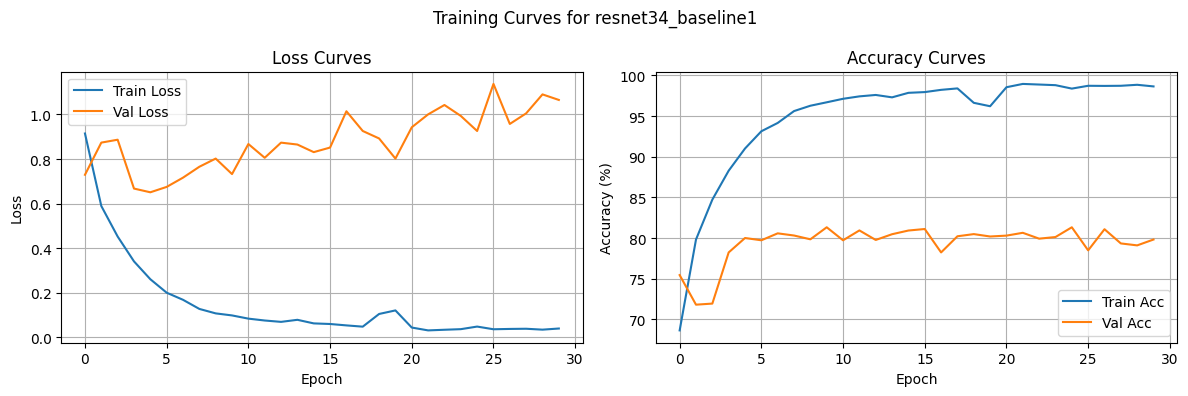

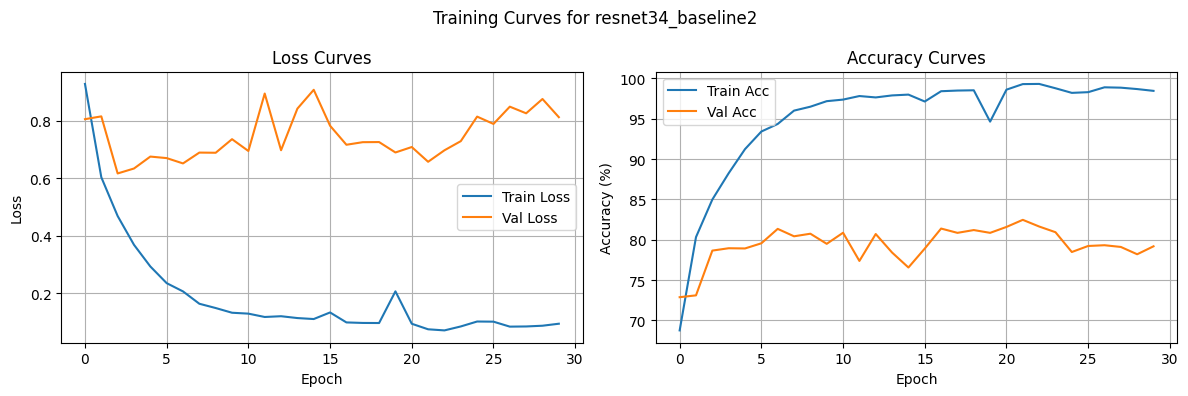

Final Test Metrics:


resnet34_baseline1:
Test Accuracy: 81.44%

xgboost_baseline2:
Test Accuracy: 53.67%
Macro AUPRC: 0.5831

Per-class AUPRC:
airplane: 0.6788
automobile: 0.7026
bird: 0.4362
cat: 0.3532
deer: 0.4988
dog: 0.4806
frog: 0.6222
horse: 0.6697
ship: 0.7337
truck: 0.6549

logistic_baseline1:
Test Accuracy: 38.68%
Macro AUPRC: 0.3735

Per-class AUPRC:
airplane: 0.4465
automobile: 0.4839
bird: 0.2656
cat: 0.2105
deer: 0.3161
dog: 0.2886
frog: 0.3456
horse: 0.4147
ship: 0.5160
truck: 0.4471

randomforest_baseline2:
Test Accuracy: 45.99%
Macro AUPRC: 0.4651

Per-class AUPRC:
airplane: 0.5670
automobile: 0.5609
bird: 0.3344
cat: 0.2947
deer: 0.4183
dog: 0.3885
frog: 0.4455
horse: 0.5225
ship: 0.6030
truck: 0.5157

resnet34_baseline2:
Test Accuracy: 83.31%

xgboost_baseline1:
Test Accuracy: 54.28%
Macro AUPRC: 0.5874

Per-class AUPRC:
airplane: 0.6816
automobile: 0.7218
bird: 0.4469
cat: 0.3585
deer: 0.5086
dog: 0.4854
frog: 0.6137
horse: 0.6604
ship: 0.7365
truck: 0.6605

random

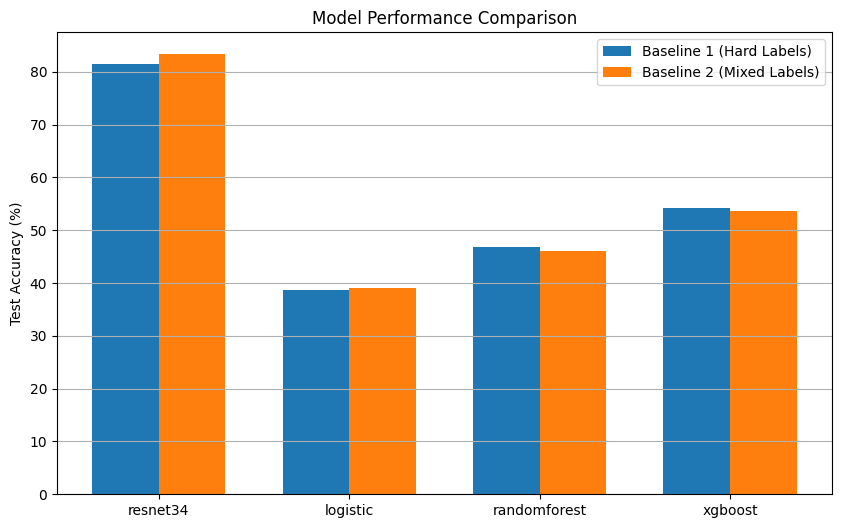

In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Load metrics from metrics folder
metrics_dir = "metrics"
metrics_files = os.listdir(metrics_dir)

all_metrics = {}
for file in metrics_files:
    model_name = file.replace("_metrics.json", "")
    with open(os.path.join(metrics_dir, file)) as f:
        metrics = json.load(f)
        all_metrics[model_name] = metrics

# Plot training curves for deep learning models
for model in ["resnet34_baseline1", "resnet34_baseline2"]:
    if model in all_metrics:
        metrics = all_metrics[model]
        
        plt.figure(figsize=(12, 4))
        
        # Plot losses
        plt.subplot(1, 2, 1)
        plt.plot(metrics["train_loss"], label="Train Loss")
        plt.plot(metrics["val_loss"], label="Val Loss") 
        plt.title("Loss Curves")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)

        # Plot accuracies
        plt.subplot(1, 2, 2)
        plt.plot(metrics["train_acc"], label="Train Acc")
        plt.plot(metrics["val_acc"], label="Val Acc")
        plt.title("Accuracy Curves")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy (%)")
        plt.legend()
        plt.grid(True)

        plt.suptitle(f"Training Curves for {model}")
        plt.tight_layout()
        plt.show()

# Print final metrics for all models
print("Final Test Metrics:\n")

for model in all_metrics:
    print(f"\n{model}:")
    metrics = all_metrics[model]
    
    # Print accuracy
    if "accuracy" in metrics:
        print(f"Test Accuracy: {metrics['accuracy']:.2f}%")
    
    # Print AUPRC metrics if available
    if "macro_auprc" in metrics:
        print(f"Macro AUPRC: {metrics['macro_auprc']:.4f}")
        
        # Print per-class AUPRC
        print("\nPer-class AUPRC:")
        for key in metrics:
            if key.startswith("class_"):
                class_name = key.replace("class_", "").replace("_auprc", "")
                print(f"{class_name}: {metrics[key]:.4f}")

# Compare baseline1 vs baseline2 for each model type
model_types = ["resnet34", "logistic", "randomforest", "xgboost"]

plt.figure(figsize=(10, 6))
x = np.arange(len(model_types))
width = 0.35

baseline1_acc = []
baseline2_acc = []

for model in model_types:
    if f"{model}_baseline1" in all_metrics:
        baseline1_acc.append(all_metrics[f"{model}_baseline1"]["accuracy"])
    else:
        baseline1_acc.append(0)
        
    if f"{model}_baseline2" in all_metrics:
        baseline2_acc.append(all_metrics[f"{model}_baseline2"]["accuracy"])
    else:
        baseline2_acc.append(0)

plt.bar(x - width/2, baseline1_acc, width, label='Baseline 1 (Hard Labels)')
plt.bar(x + width/2, baseline2_acc, width, label='Baseline 2 (Mixed Labels)')

plt.ylabel('Test Accuracy (%)')
plt.title('Model Performance Comparison')
plt.xticks(x, model_types)
plt.legend()
plt.grid(True, axis='y')
plt.show()
